In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.set_figure_params(dpi=80, dpi_save=300)

scanpy==1.4 anndata==0.6.18 numpy==1.16.1 scipy==1.2.0 pandas==0.23.4 scikit-learn==0.20.2 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [3]:
fname_list = ['../../TM_datasets/Kidney-10X_P4_5', '../../TM_datasets/Kidney-10X_P4_6', '../../TM_datasets/Kidney-10X_P7_5']
anno_fname = "../Anno_TM.csv"

In [4]:
batch_list = [fname.split('/')[-1] for fname in fname_list]
batch_list

['Kidney-10X_P4_5', 'Kidney-10X_P4_6', 'Kidney-10X_P7_5']

In [5]:
adata_list = [sc.read_10x_mtx(fname, var_names='gene_symbols', cache=True) for fname in fname_list]

... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time
... writing an h5ad cache file to speedup reading next time


In [7]:
adata_list[0]

AnnData object with n_obs × n_vars = 610 × 23433 
    var: 'gene_ids'

In [8]:
adata = adata_list[0].concatenate(*adata_list[1:], join='inner', batch_key='batch', batch_categories=batch_list)
adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 2782 × 23433 
    obs: 'batch'
    var: 'gene_ids-Kidney-10X_P4_5', 'gene_ids-Kidney-10X_P4_6', 'gene_ids-Kidney-10X_P7_5'

In [9]:
obs = adata.obs
obs['CellID'] = adata.obs.index.map(lambda x: x.split('-')[-1]+'_'+x.split('-')[0])
obs.iloc[:5,:]

,batch,CellID
AAACCTGAGATGCCAG-1-Kidney-10X_P4_5,Kidney-10X_P4_5,10X_P4_5_AAACCTGAGATGCCAG
AAACCTGAGTGTCCAT-1-Kidney-10X_P4_5,Kidney-10X_P4_5,10X_P4_5_AAACCTGAGTGTCCAT
AAACCTGCAAGGCTCC-1-Kidney-10X_P4_5,Kidney-10X_P4_5,10X_P4_5_AAACCTGCAAGGCTCC
AAACCTGTCCTTGCCA-1-Kidney-10X_P4_5,Kidney-10X_P4_5,10X_P4_5_AAACCTGTCCTTGCCA
AAACGGGAGCTGAACG-1-Kidney-10X_P4_5,Kidney-10X_P4_5,10X_P4_5_AAACGGGAGCTGAACG


In [10]:
anno_df = pd.read_csv(anno_fname, header=0, index_col=0, sep=',')
anno_df.iloc[:5,:]

,cell_ontology_class,channel,tissue,CellID,CellType
0,myeloid cell,10X_P7_8,Lung,10X_P7_8_AAACGGGAGGATATAC,Myeloid
1,alveolar macrophage,10X_P7_8,Lung,10X_P7_8_AAACGGGTCTCGTATT,Macrophage
2,B cell,10X_P7_8,Lung,10X_P7_8_AAAGATGCAGATCTGT,B cell
3,natural killer cell,10X_P7_8,Lung,10X_P7_8_AAATGCCAGATAGTCA,NK cell
4,T cell,10X_P7_8,Lung,10X_P7_8_AAATGCCCAAACTGCT,T cell


In [11]:
# process with annotation
obs_anno = obs.merge(anno_df, how='left', on='CellID', sort=False)
obs_anno.index = obs.index
obs_anno.iloc[:5,:]

,batch,CellID,cell_ontology_class,channel,tissue,CellType
AAACCTGAGATGCCAG-1-Kidney-10X_P4_5,Kidney-10X_P4_5,10X_P4_5_AAACCTGAGATGCCAG,leukocyte,10X_P4_5,Kidney,Leukocyte
AAACCTGAGTGTCCAT-1-Kidney-10X_P4_5,Kidney-10X_P4_5,10X_P4_5_AAACCTGAGTGTCCAT,kidney capillary endothelial cell,10X_P4_5,Kidney,Endothelial
AAACCTGCAAGGCTCC-1-Kidney-10X_P4_5,Kidney-10X_P4_5,10X_P4_5_AAACCTGCAAGGCTCC,mesangial cell,10X_P4_5,Kidney,Mesenchymal
AAACCTGTCCTTGCCA-1-Kidney-10X_P4_5,Kidney-10X_P4_5,10X_P4_5_AAACCTGTCCTTGCCA,kidney cell,10X_P4_5,Kidney,Kidney cell
AAACGGGAGCTGAACG-1-Kidney-10X_P4_5,Kidney-10X_P4_5,10X_P4_5_AAACGGGAGCTGAACG,kidney collecting duct epithelial cell,10X_P4_5,Kidney,Epithelial


In [12]:
obs_anno['CellType'] = obs_anno['CellType'].fillna("Other")
obs_anno['CellType'].isna()

AAACCTGAGATGCCAG-1-Kidney-10X_P4_5    False
AAACCTGAGTGTCCAT-1-Kidney-10X_P4_5    False
AAACCTGCAAGGCTCC-1-Kidney-10X_P4_5    False
AAACCTGTCCTTGCCA-1-Kidney-10X_P4_5    False
AAACGGGAGCTGAACG-1-Kidney-10X_P4_5    False
AAACGGGCAGGACCCT-1-Kidney-10X_P4_5    False
AAACGGGCATGGTCAT-1-Kidney-10X_P4_5    False
AAAGATGCATCTATGG-1-Kidney-10X_P4_5    False
AAAGCAAGTCGTTGTA-1-Kidney-10X_P4_5    False
AAAGTAGCATCCAACA-1-Kidney-10X_P4_5    False
AACACGTGTTTCGCTC-1-Kidney-10X_P4_5    False
AACACGTTCTCAAGTG-1-Kidney-10X_P4_5    False
AACCATGAGTTGCAGG-1-Kidney-10X_P4_5    False
AACCGCGAGGATATAC-1-Kidney-10X_P4_5    False
AACGTTGCATAGTAAG-1-Kidney-10X_P4_5    False
AACTCTTGTGTTGAGG-1-Kidney-10X_P4_5    False
AACTCTTGTTATGCGT-1-Kidney-10X_P4_5    False
AACTCTTGTTGCTCCT-1-Kidney-10X_P4_5    False
AACTGGTAGCCAGTAG-1-Kidney-10X_P4_5    False
AACTGGTCAAACGTGG-1-Kidney-10X_P4_5    False
AACTTTCGTAAGTAGT-1-Kidney-10X_P4_5    False
AAGCCGCAGGAGTACC-1-Kidney-10X_P4_5    False
AAGGAGCGTAAGTTCC-1-Kidney-10X_P4

In [13]:
adata.obs = obs_anno
adata

AnnData object with n_obs × n_vars = 2782 × 23433 
    obs: 'batch', 'CellID', 'cell_ontology_class', 'channel', 'tissue', 'CellType'
    var: 'gene_ids-Kidney-10X_P4_5', 'gene_ids-Kidney-10X_P4_6', 'gene_ids-Kidney-10X_P7_5'

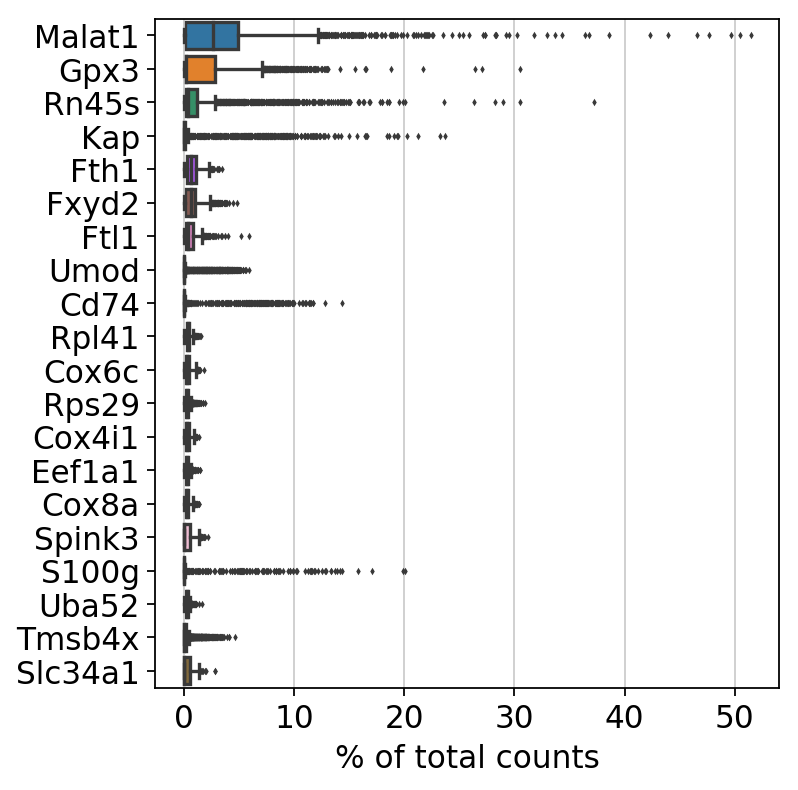

In [14]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [15]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 1 cells that have less than 200 genes expressed
filtered out 7867 genes that are detected in less than 3 cells


In [17]:
mito_genes = adata.var_names.str.startswith('MT-')
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

... storing 'cell_ontology_class' as categorical
... storing 'channel' as categorical
... storing 'tissue' as categorical
... storing 'CellType' as categorical


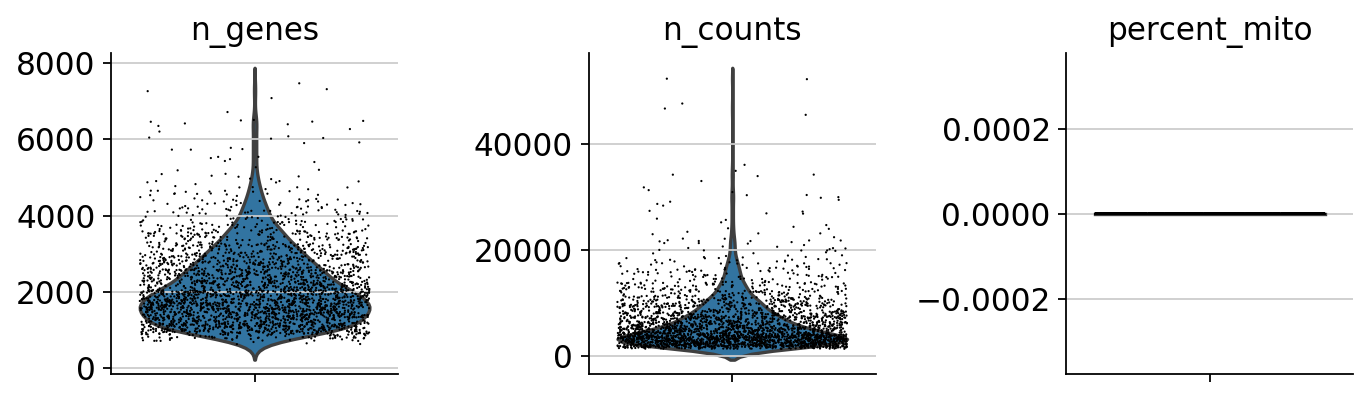

In [18]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0.4, multi_panel=True)

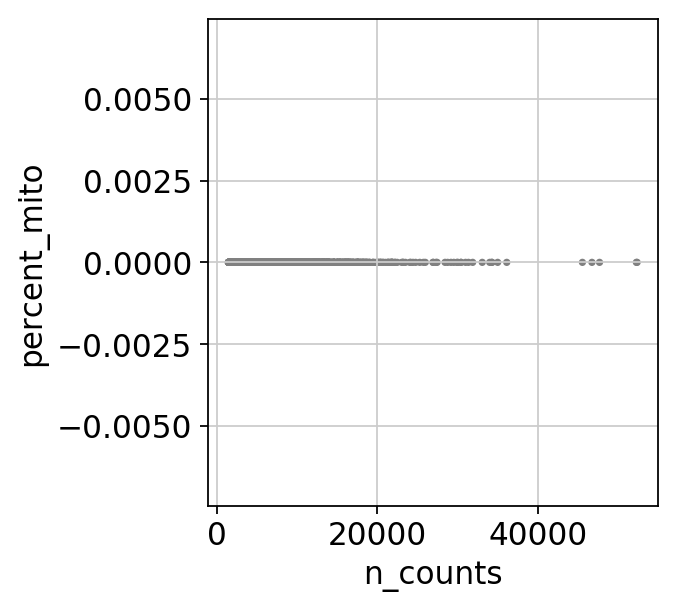

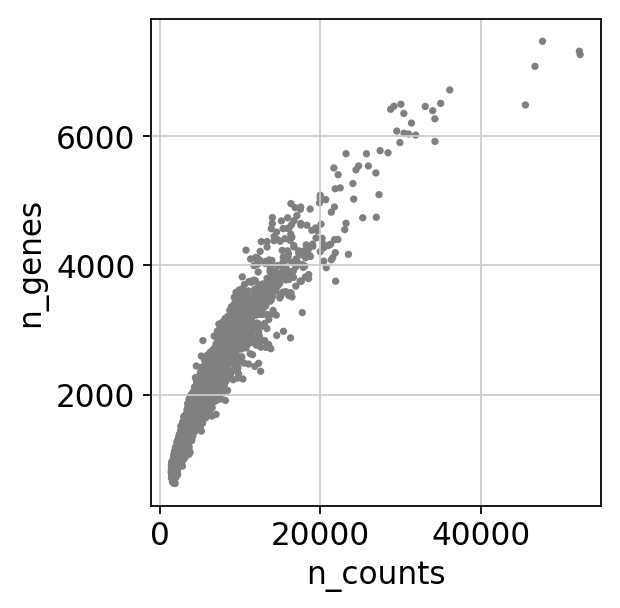

In [19]:
sc.pl.scatter(adata, x='n_counts', y='percent_mito')
sc.pl.scatter(adata, x='n_counts', y='n_genes')

In [20]:
adata = adata[adata.obs.n_genes < 2500, :]
adata = adata[adata.obs.percent_mito < 0.05, :]

In [21]:
adata

View of AnnData object with n_obs × n_vars = 1948 × 15566 
    obs: 'batch', 'CellID', 'cell_ontology_class', 'channel', 'tissue', 'CellType', 'n_genes', 'percent_mito', 'n_counts'
    var: 'gene_ids-Kidney-10X_P4_5', 'gene_ids-Kidney-10X_P4_6', 'gene_ids-Kidney-10X_P7_5', 'n_cells'

In [22]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

In [23]:
sc.pp.log1p(adata)

In [24]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


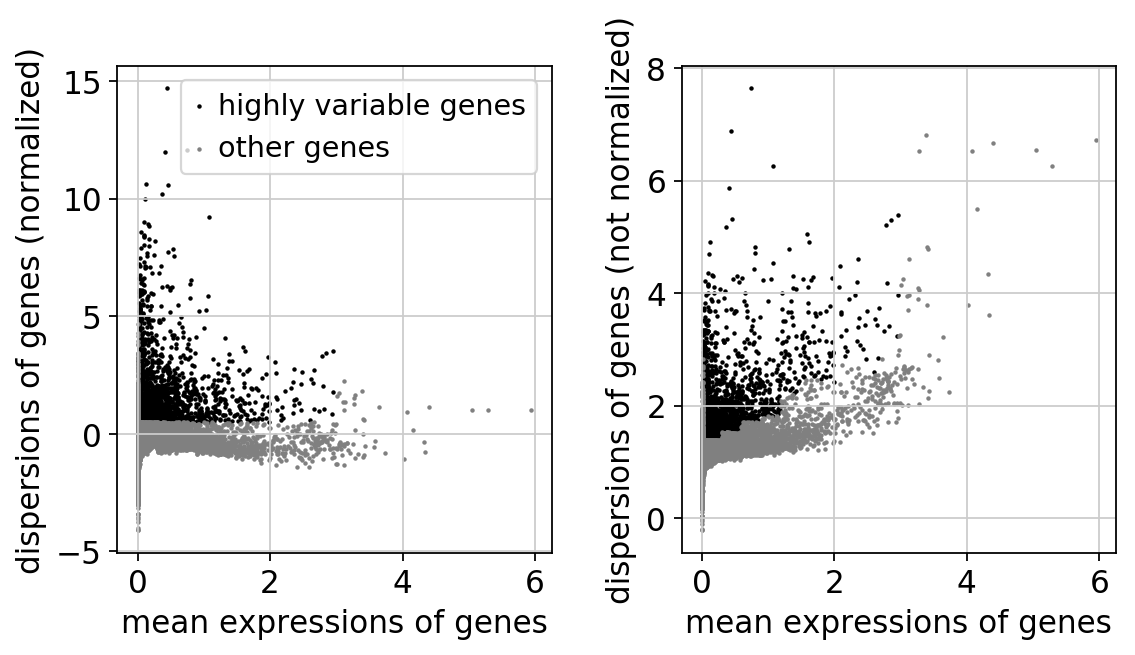

In [25]:
sc.pl.highly_variable_genes(adata)

In [26]:
adata = adata[:, adata.var.highly_variable]

In [27]:
sc.pp.regress_out(adata, ['n_counts', 'percent_mito'])

regressing out ['n_counts', 'percent_mito']
    sparse input is densified and may lead to high memory use
    finished (0:00:04.99)


In [28]:
adata

AnnData object with n_obs × n_vars = 1948 × 1888 
    obs: 'batch', 'CellID', 'cell_ontology_class', 'channel', 'tissue', 'CellType', 'n_genes', 'percent_mito', 'n_counts'
    var: 'gene_ids-Kidney-10X_P4_5', 'gene_ids-Kidney-10X_P4_6', 'gene_ids-Kidney-10X_P7_5', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [29]:
adata_base = adata.copy()

In [30]:
sc.pp.scale(adata_base, max_value=10)

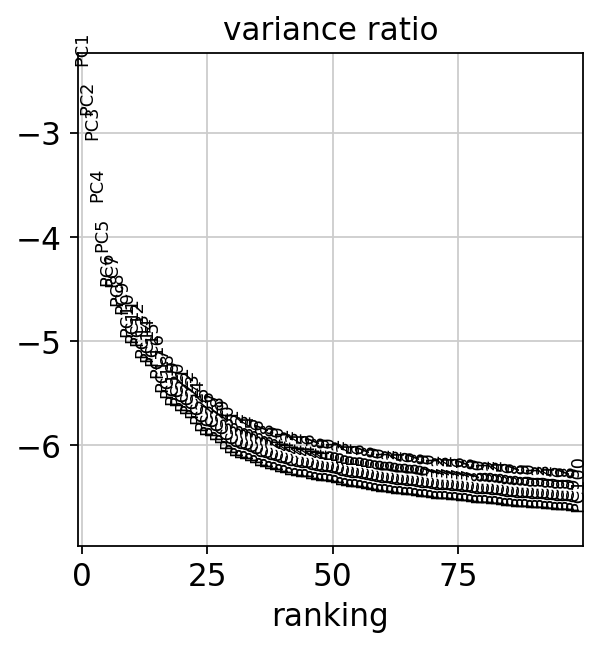

In [31]:
## PCA
sc.tl.pca(adata_base, n_comps=100, svd_solver='arpack')
# Pick nPC
sc.pl.pca_variance_ratio(adata_base, log=True, show=100, n_pcs=100)

In [32]:
#nPC=45
sc.pp.neighbors(adata_base, n_pcs=45, n_neighbors=15)

computing neighbors
    using 'X_pca' with n_pcs = 45
    finished (0:01:15.28) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix


In [33]:
#run tSNE
sc.tl.tsne(adata_base, n_pcs=45, use_fast_tsne=True, n_jobs=20, perplexity=30)

computing tSNE
    using 'X_pca' with n_pcs = 45
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished (0:00:08.14) --> added
    'X_tsne', tSNE coordinates (adata.obsm)


saving figure to file ./figures/tsne_Batch_Baseline_1.pdf


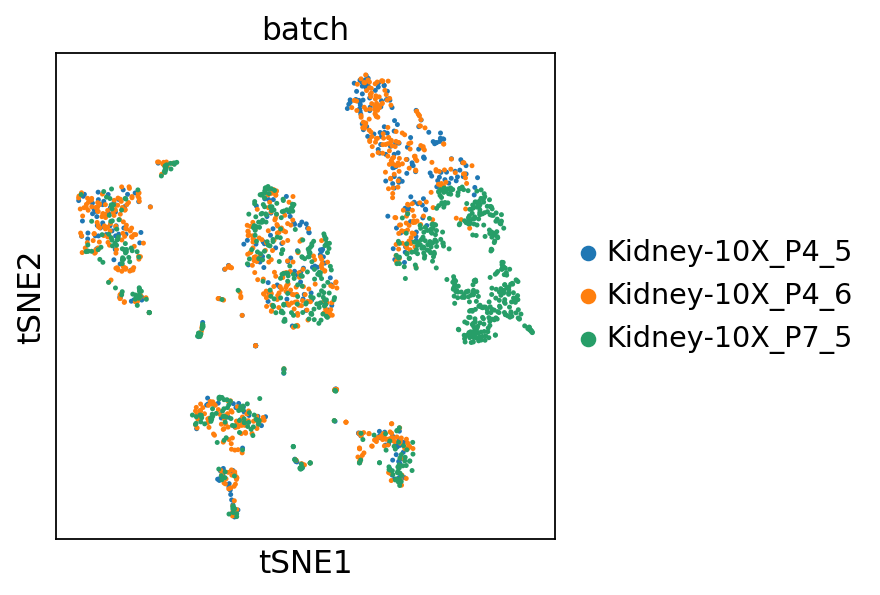

saving figure to file ./figures/tsne_CellType_Baseline_1.pdf


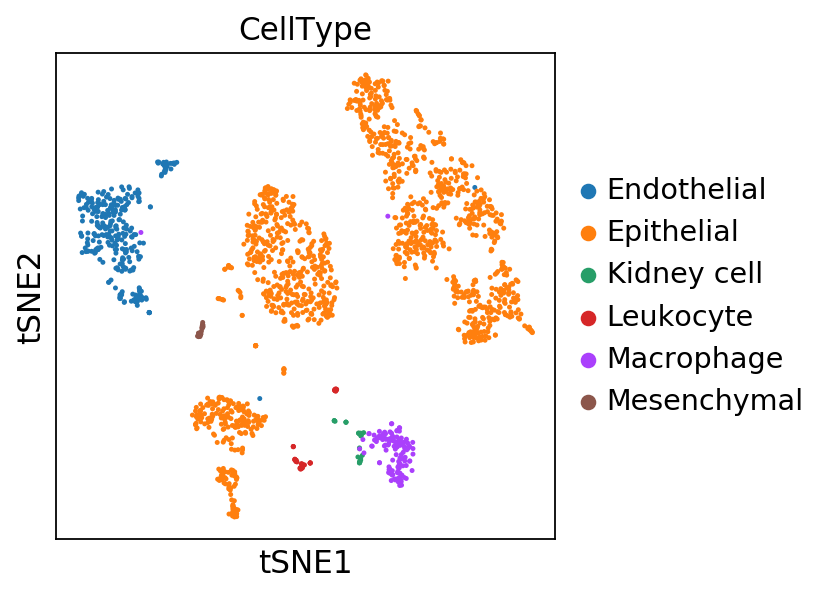

saving figure to file ./figures/tsne_CellType_Baseline_ondata_1.pdf


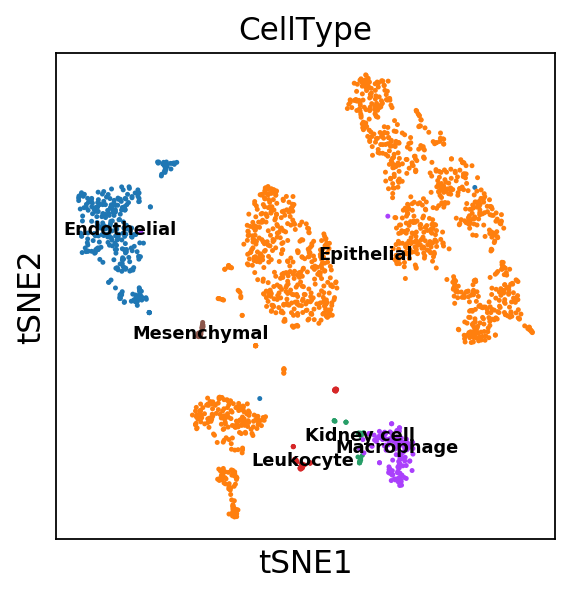

In [4]:
sc.pl.tsne(adata_base, color=['batch'], size=20, save="_Batch_Baseline_1.pdf")
sc.pl.tsne(adata_base, color=['CellType'], size=20, save="_CellType_Baseline_1.pdf")
sc.pl.tsne(adata_base, color=['CellType'], size=20, legend_loc='on data', legend_fontsize=8, save="_CellType_Baseline_ondata_1.pdf")

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.17) --> found 13 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)
saving figure to file ./figures/tsne_Cluster_baseline_1.pdf


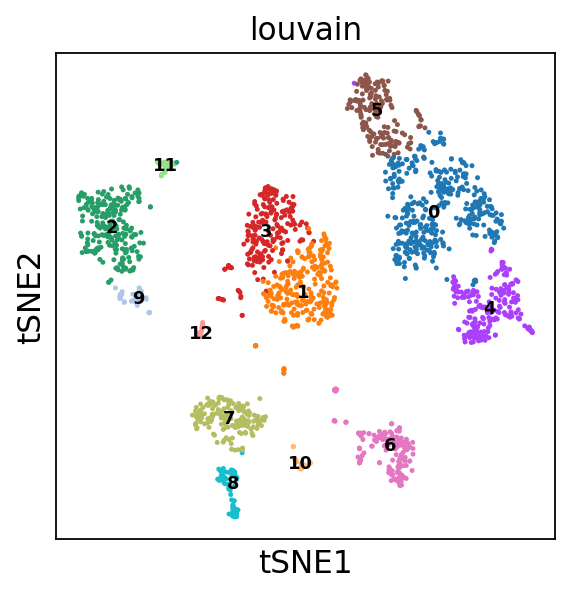

In [5]:
#res=0.6
sc.tl.louvain(adata_base, resolution=0.6)
sc.pl.tsne(adata_base, color='louvain', size=20, legend_loc='on data', legend_fontsize=8,save='_Cluster_baseline_1.pdf')

In [38]:
adata_base.obs['louvain'].to_csv("./cluster_Baseline.txt", index=False)

In [3]:
#adata_base=sc.read("adata_base.h5ad")

In [39]:
adata_reg = adata.copy()

In [40]:
%%time
sc.pp.regress_out(adata_reg, ['batch'])

regressing out ['batch']
    finished (0:00:04.97)
CPU times: user 4.96 s, sys: 20.1 ms, total: 4.98 s
Wall time: 4.98 s


In [41]:
## scale the data
sc.pp.scale(adata_reg, max_value=10)

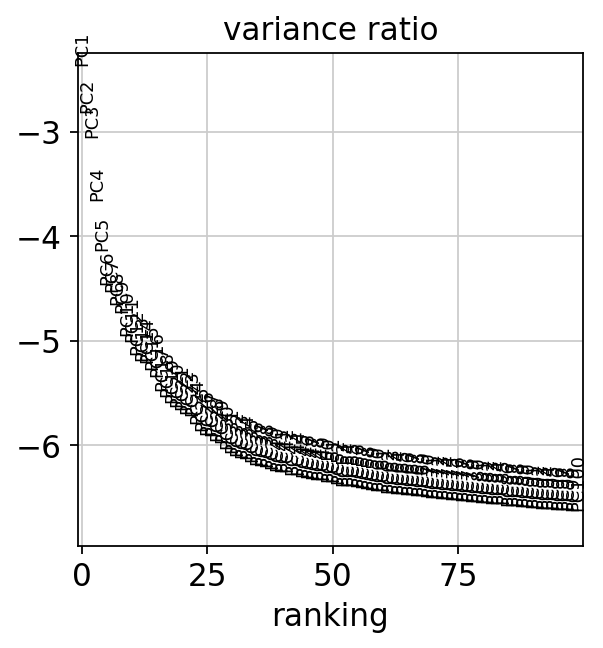

In [42]:
## PCA
sc.tl.pca(adata_reg,  n_comps=100, svd_solver='arpack')
# Pick nPC
sc.pl.pca_variance_ratio(adata_reg, log=True, show=100, n_pcs=100)

In [43]:
#nPC=45
sc.pp.neighbors(adata_reg, n_pcs=45, n_neighbors=15)

computing neighbors
    using 'X_pca' with n_pcs = 45
    finished (0:01:42.57) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix


In [44]:
#run tSNE
sc.tl.tsne(adata_reg, n_pcs=45, use_fast_tsne=True, n_jobs=20, perplexity=30)

computing tSNE
    using 'X_pca' with n_pcs = 45
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished (0:00:06.95) --> added
    'X_tsne', tSNE coordinates (adata.obsm)


saving figure to file ./figures/tsne_Batch_reg_1.pdf


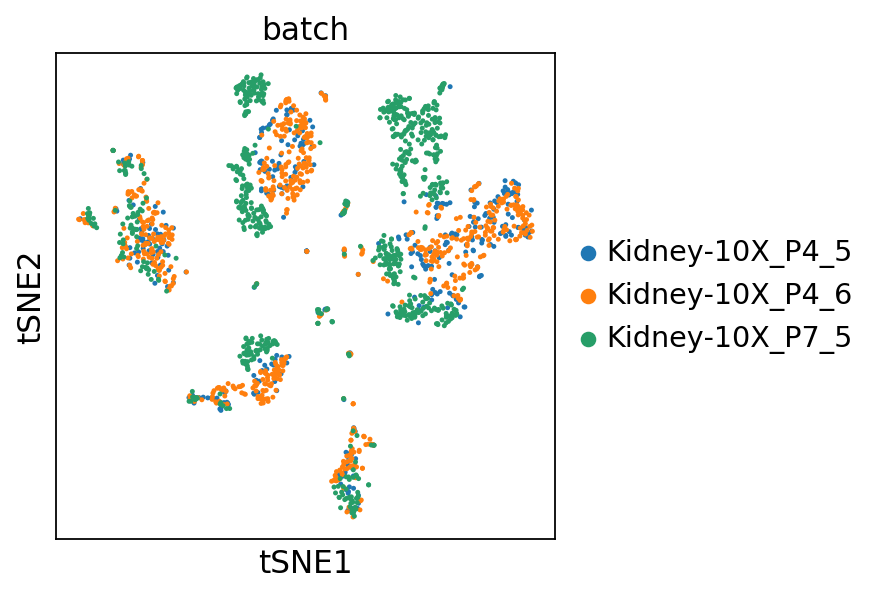

saving figure to file ./figures/tsne_CellType_reg_1.pdf


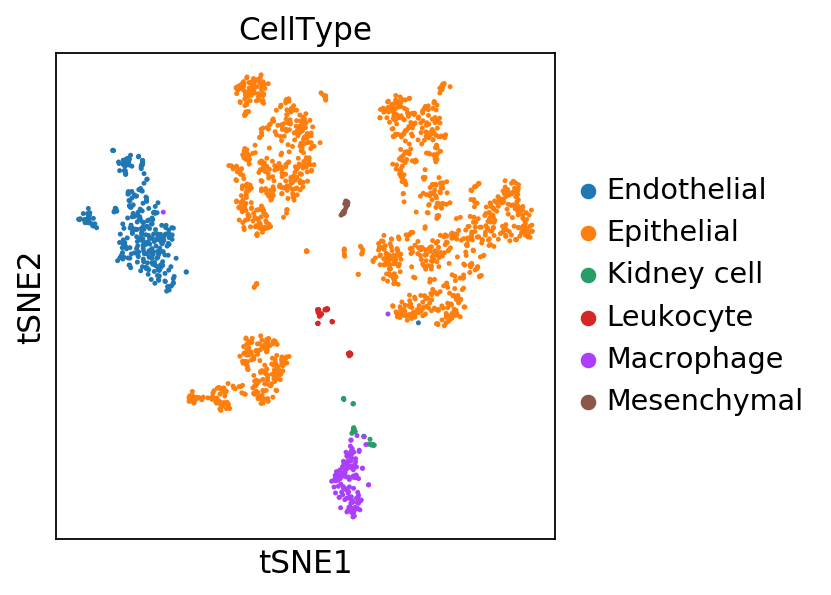

saving figure to file ./figures/tsne_CellType_reg_ondata_1.pdf


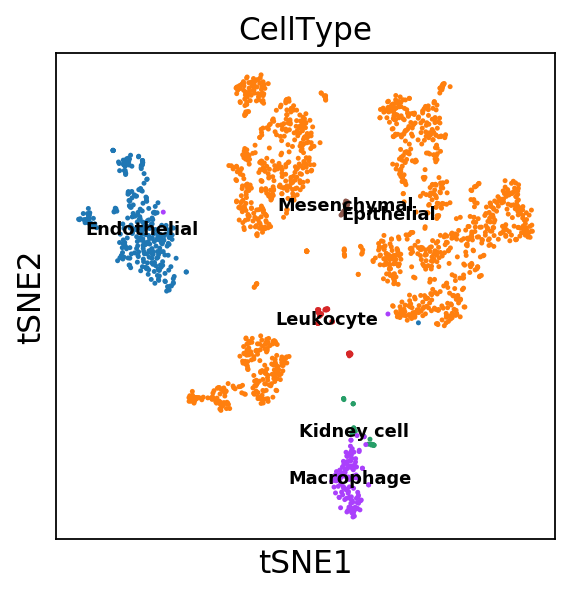

In [8]:
sc.pl.tsne(adata_reg, color=['batch'], size=20, save="_Batch_reg_1.pdf")
sc.pl.tsne(adata_reg, color=['CellType'], size=20, save="_CellType_reg_1.pdf")
sc.pl.tsne(adata_reg, color=['CellType'], size=20, legend_loc='on data', legend_fontsize=8, save="_CellType_reg_ondata_1.pdf")

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.14) --> found 12 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)
saving figure to file ./figures/tsne_Cluster_reg_1.pdf


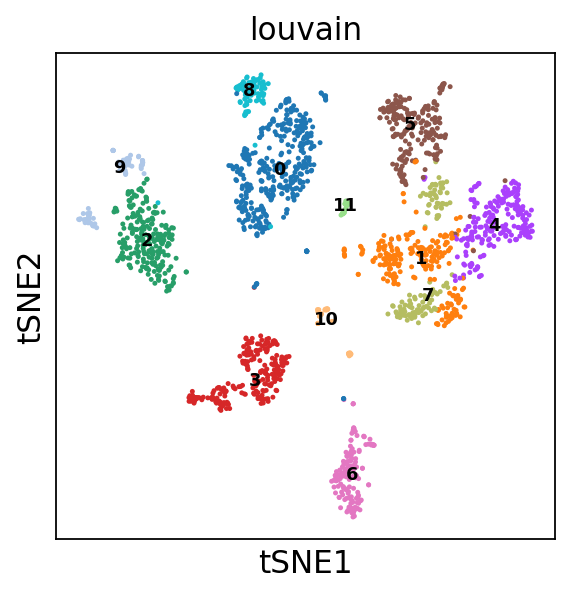

In [7]:
#res=0.6
sc.tl.louvain(adata_reg, resolution=0.6)
sc.pl.tsne(adata_reg, color='louvain',size=20,legend_loc='on data', legend_fontsize=8, save='_Cluster_reg_1.pdf')

In [49]:
adata_reg.obs['louvain'].to_csv("./cluster_reg.txt", index=False)

In [6]:
#adata_reg=sc.read("adata_reg.h5ad")

In [50]:
adata_combat = adata.copy()

In [51]:
%%time
sc.pp.combat(adata_combat, key='batch')

Standardizing Data across genes.
found 3 batches
found 0 categorical variables:	
Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting data
CPU times: user 9.54 s, sys: 8.73 s, total: 18.3 s
Wall time: 1.41 s


In [52]:
## scale the data
sc.pp.scale(adata_combat, max_value=10)

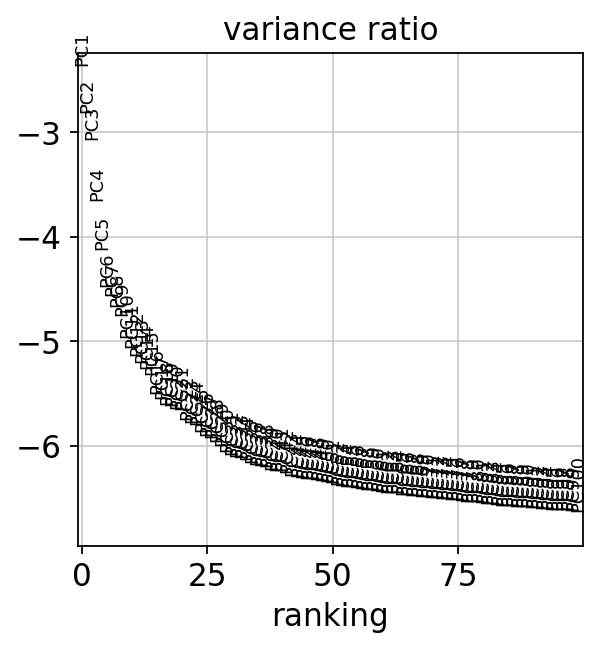

In [53]:
## PCA
sc.tl.pca(adata_combat,  n_comps=100, svd_solver='arpack')
# Pick nPC
sc.pl.pca_variance_ratio(adata_combat, log=True, show=100, n_pcs=100)

In [54]:
#nPC=45
sc.pp.neighbors(adata_combat, n_neighbors=15, n_pcs=45)

computing neighbors
    using 'X_pca' with n_pcs = 45
    finished (0:00:00.76) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix


In [55]:
#run tSNE
sc.tl.tsne(adata_combat, n_pcs=45, use_fast_tsne=True, n_jobs=20, perplexity=30)

computing tSNE
    using 'X_pca' with n_pcs = 45
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished (0:00:09.92) --> added
    'X_tsne', tSNE coordinates (adata.obsm)


saving figure to file ./figures/tsne_Batch_Combat_1.pdf


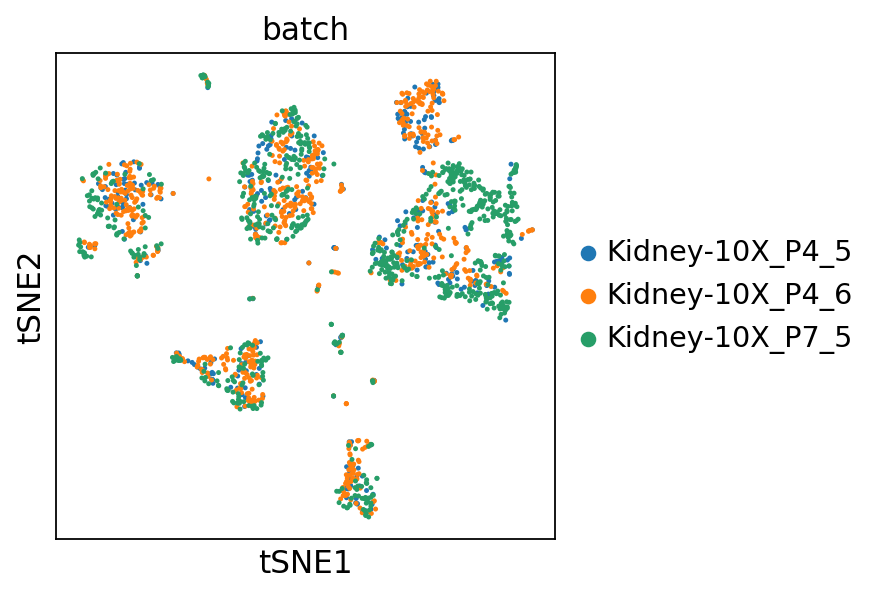

saving figure to file ./figures/tsne_CellType_Combat_1.pdf


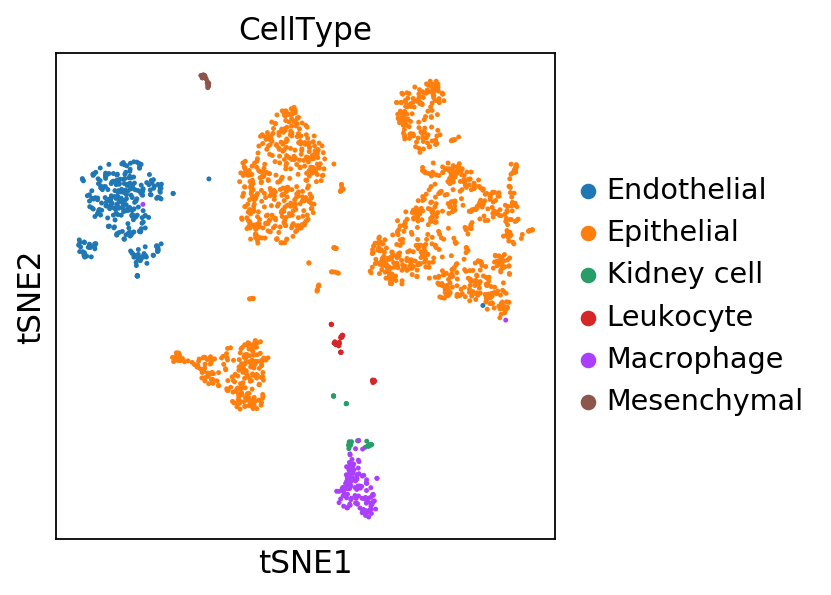

saving figure to file ./figures/tsne_CellType_Combat_ondata_1.pdf


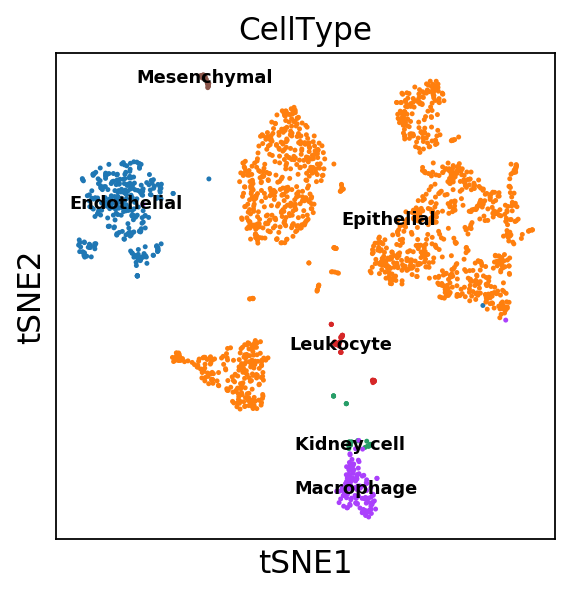

In [11]:
sc.pl.tsne(adata_combat, color=['batch'], size=20, save="_Batch_Combat_1.pdf")
sc.pl.tsne(adata_combat, color=['CellType'], size=20, save="_CellType_Combat_1.pdf")
sc.pl.tsne(adata_combat, color=['CellType'], size=20, legend_loc='on data', legend_fontsize=8, save="_CellType_Combat_ondata_1.pdf")

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.17) --> found 10 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)
saving figure to file ./figures/tsne_Cluster_Combat_1.pdf


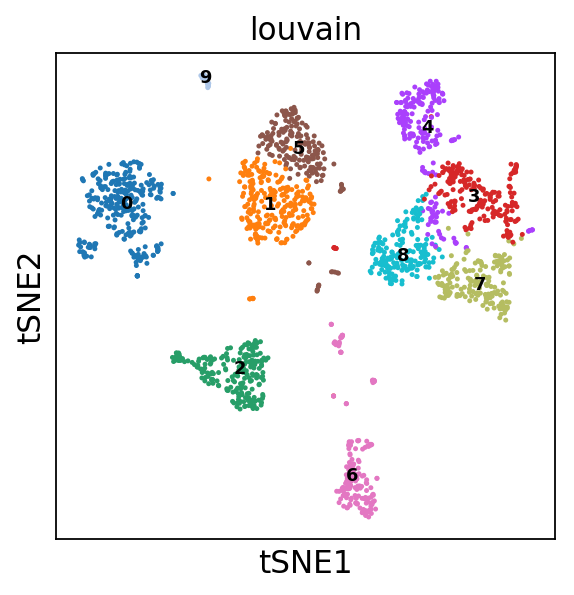

In [10]:
#res=0.6
sc.tl.louvain(adata_combat, resolution=0.6)
sc.pl.tsne(adata_combat, color='louvain', size=20, legend_loc='on data', legend_fontsize=8,save='_Cluster_Combat_1.pdf')

In [60]:
adata_combat.obs['louvain'].to_csv("./cluster_Combat.txt", index=False)

In [9]:
#adata_combat=sc.read("adata_combat.h5ad")

In [61]:
import scanorama

In [62]:
adata_scanorama = adata.copy()

In [63]:
adata_list = [adata_scanorama[adata_scanorama.obs['batch'] == i] for i in adata_scanorama.obs['batch'].unique()]

In [64]:
#check
print(adata_list[0].shape)
print(adata_list[0])

(386, 1888)
View of AnnData object with n_obs × n_vars = 386 × 1888 
    obs: 'batch', 'CellID', 'cell_ontology_class', 'channel', 'tissue', 'CellType', 'n_genes', 'percent_mito', 'n_counts'
    var: 'gene_ids-Kidney-10X_P4_5', 'gene_ids-Kidney-10X_P4_6', 'gene_ids-Kidney-10X_P7_5', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'


In [65]:
%%time
intergrated, corrected = scanorama.correct_scanpy(adata_list, return_dimred=True)

Found 1888 genes among all datasets
[[0.         0.96373057 0.66839378]
 [0.         0.         0.87559809]
 [0.         0.         0.        ]]
Processing datasets (0, 1)
Processing datasets (1, 2)
Processing datasets (0, 2)
CPU times: user 52 s, sys: 48.4 s, total: 1min 40s
Wall time: 8.11 s


In [66]:
corrected_merged_dge = corrected[0].concatenate(*corrected[1:])
corrected_merged_dge.obs = adata_scanorama.obs

In [67]:
## scale the data
sc.pp.scale(corrected_merged_dge, max_value=10)

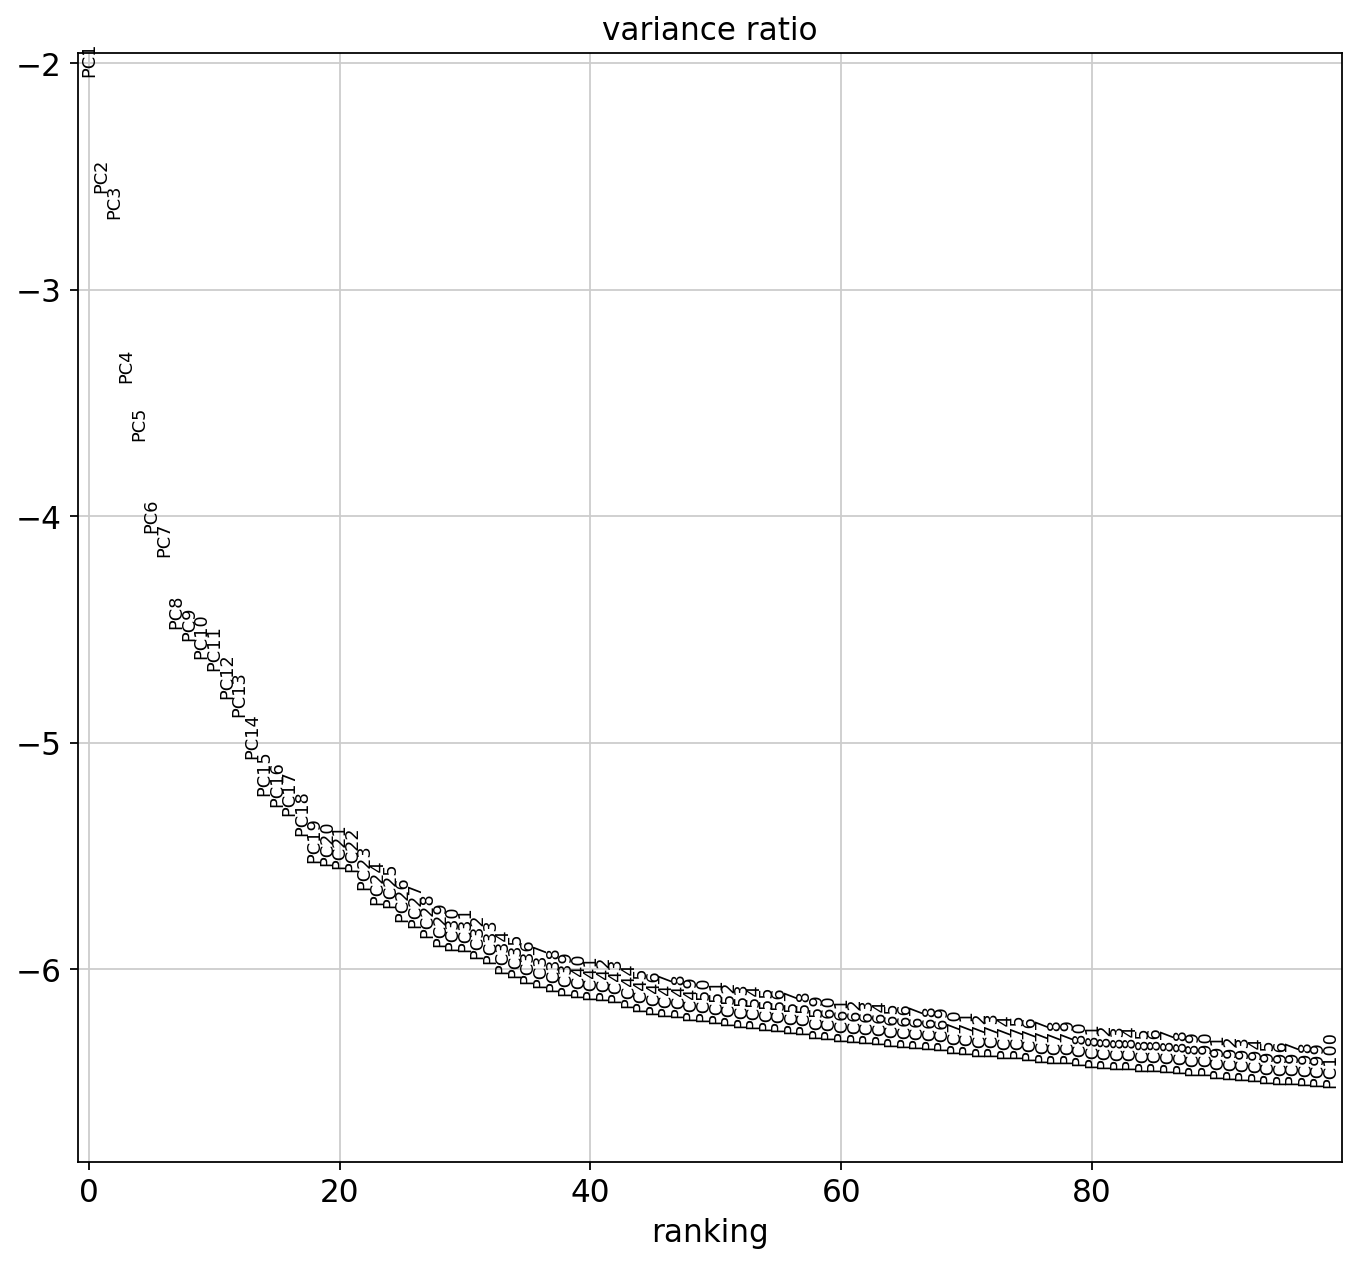

In [68]:
## PCA
sc.tl.pca(corrected_merged_dge, n_comps=100, svd_solver='arpack')
# Pick nPC
sc.pl.pca_variance_ratio(corrected_merged_dge, log=True, show=100, n_pcs=100)

In [69]:
#nPC=45
sc.pp.neighbors(corrected_merged_dge, n_neighbors=15, n_pcs=45)

computing neighbors
    using 'X_pca' with n_pcs = 45
    finished (0:00:00.79) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix


In [70]:
#run tSNE
sc.tl.tsne(corrected_merged_dge, n_pcs=45, use_fast_tsne=True, n_jobs=20, perplexity=30)

computing tSNE
    using 'X_pca' with n_pcs = 45
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished (0:00:07.77) --> added
    'X_tsne', tSNE coordinates (adata.obsm)


saving figure to file ./figures/tsne_Batch_Scanorama_1.pdf


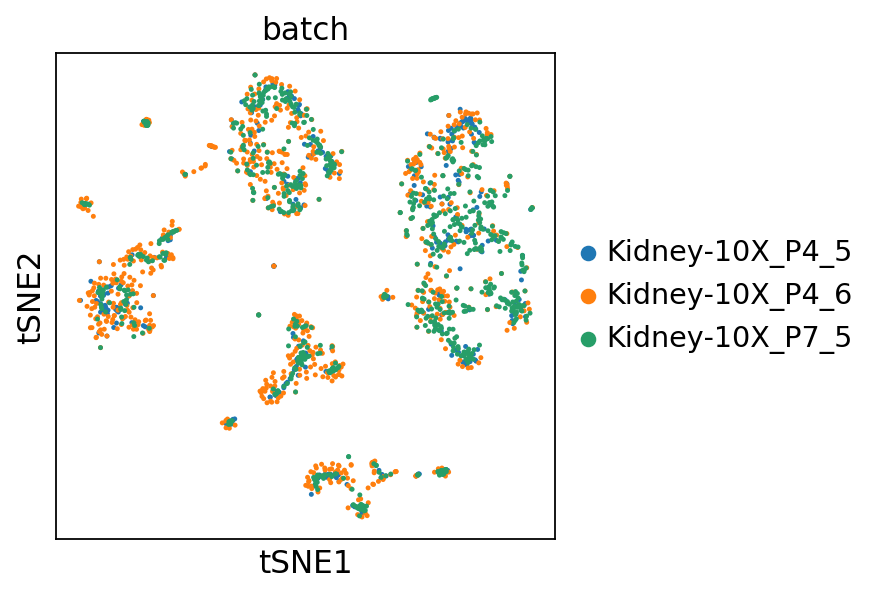

saving figure to file ./figures/tsne_CellType_Scanorama_1.pdf


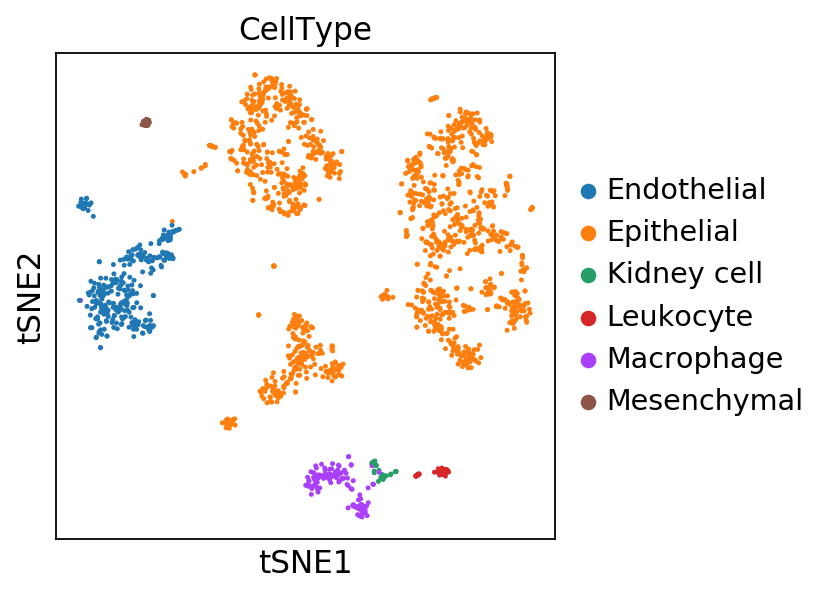

saving figure to file ./figures/tsne_CellType_Scanoram_ondata_1.pdf


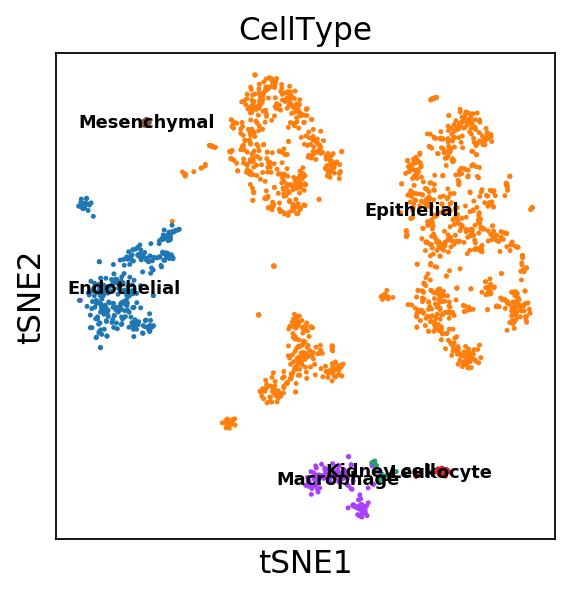

In [7]:
sc.pl.tsne(corrected_merged_dge, color=['batch'], size=20, save="_Batch_Scanorama.pdf")
sc.pl.tsne(corrected_merged_dge, color=['CellType'], size=20, save="_CellType_Scanorama.pdf")
sc.pl.tsne(corrected_merged_dge, color=['CellType'], size=20, legend_loc='on data', legend_fontsize=8, save="_CellType_Scanoram_ondata.pdf")

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.16) --> found 13 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)
saving figure to file ./figures/tsne_Cluster_Scanorama_1.pdf


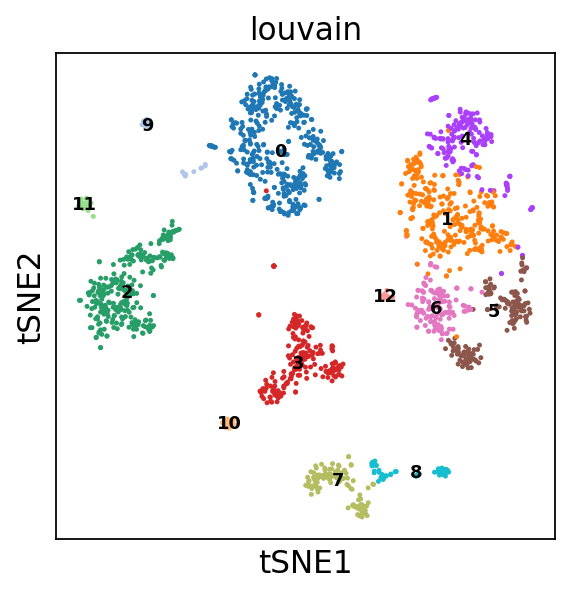

In [8]:
#res=0.6
sc.tl.louvain(corrected_merged_dge, resolution=0.6)
sc.pl.tsne(corrected_merged_dge, color='louvain', size=20, legend_loc='on data', legend_fontsize=8,save='_Cluster_Scanorama.pdf')

In [73]:
corrected_merged_dge.obs['louvain'].to_csv("./cluster_Scanorama.txt", index=False)

In [6]:
#corrected_merged_dge=sc.read("adata_scanorama.h5ad")

In [74]:
adata_mnn = adata.copy()

In [75]:
%%time
adata_mnn, _, _ = sc.external.pp.mnn_correct(*adata_list)

Performing cosine normalization...
Starting MNN correct iteration. Reference batch: 0
Step 1 of 2: processing batch 1
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
Step 2 of 2: processing batch 2
  Looking for MNNs...
  Computing correction vectors...
  Adjusting variance...
  Applying correction...
MNN correction complete. Gathering output...
Packing AnnData object...
Done.
CPU times: user 1min 3s, sys: 18.8 s, total: 1min 22s
Wall time: 10.2 s


In [76]:
## scale the data
sc.pp.scale(adata_mnn, max_value=10)

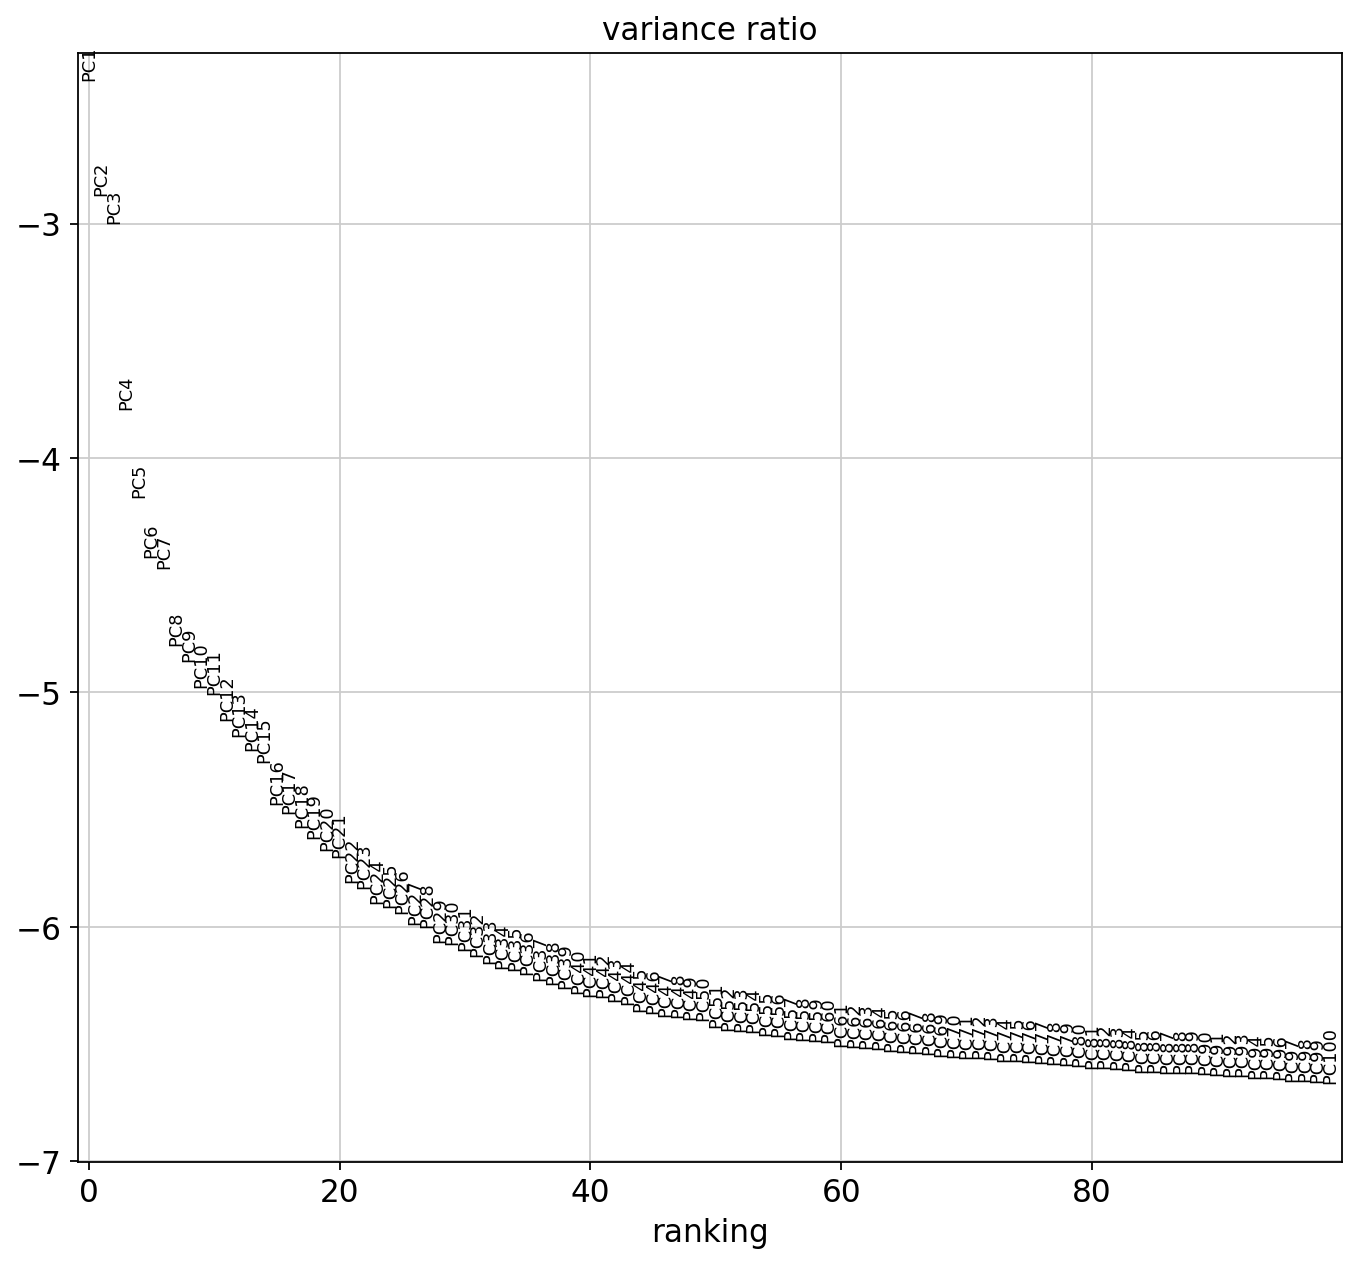

In [77]:
## PCA
sc.tl.pca(adata_mnn, n_comps=100, svd_solver='arpack')
# Pick nPC
sc.pl.pca_variance_ratio(adata_mnn, log=True, show=100, n_pcs=100)

In [78]:
#nPC=45
sc.pp.neighbors(adata_mnn, n_pcs=45, n_neighbors=15)

computing neighbors
    using 'X_pca' with n_pcs = 45
    finished (0:00:00.70) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix


In [79]:
sc.tl.tsne(adata_mnn, n_pcs=45, use_fast_tsne=True, n_jobs=20, perplexity=30)

computing tSNE
    using 'X_pca' with n_pcs = 45
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished (0:00:09.52) --> added
    'X_tsne', tSNE coordinates (adata.obsm)


saving figure to file ./figures/tsne_Batch_mnn.pdf


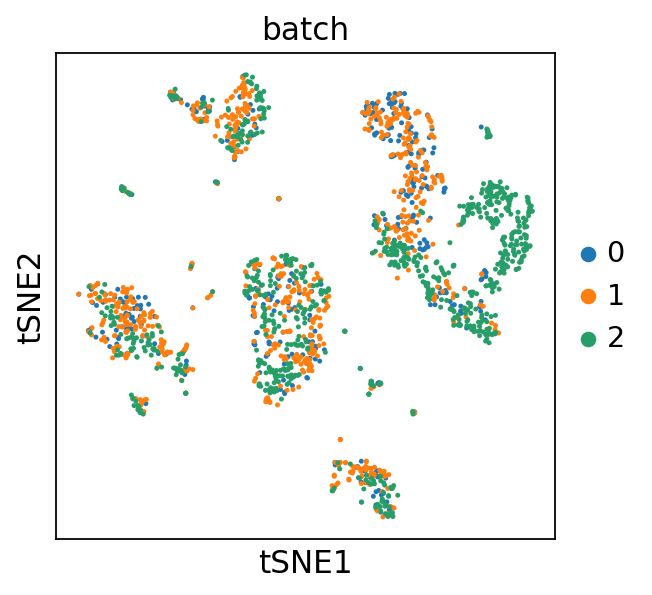

saving figure to file ./figures/tsne_CellType_mnn.pdf


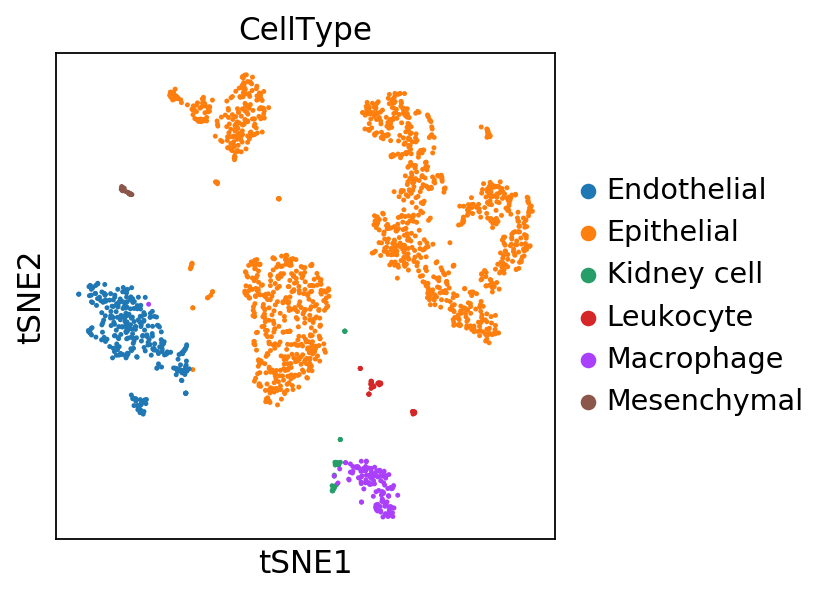

saving figure to file ./figures/tsne_CellType_mnn_ondata.pdf


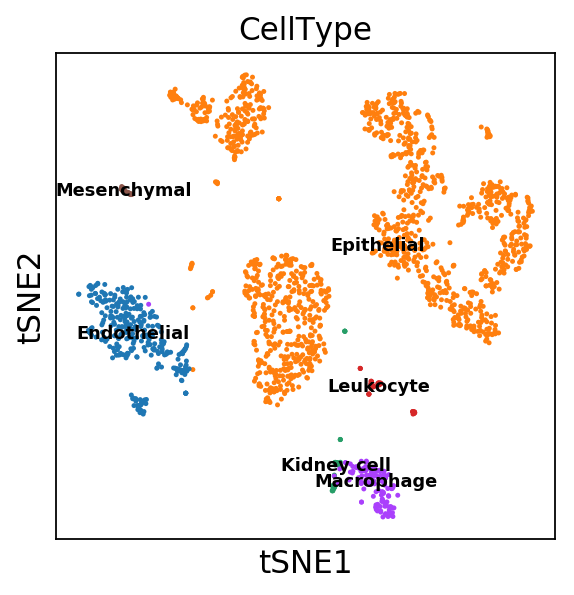

In [4]:
sc.pl.tsne(adata_mnn, color=['batch'], size=20, save="_Batch_mnn.pdf")
sc.pl.tsne(adata_mnn, color=['CellType'], size=20, save="_CellType_mnn.pdf")
sc.pl.tsne(adata_mnn, color=['CellType'], size=20, legend_loc='on data', legend_fontsize=8, save="_CellType_mnn_ondata.pdf")

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.17) --> found 12 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)
saving figure to file ./figures/tsne_Cluster_mnn.pdf


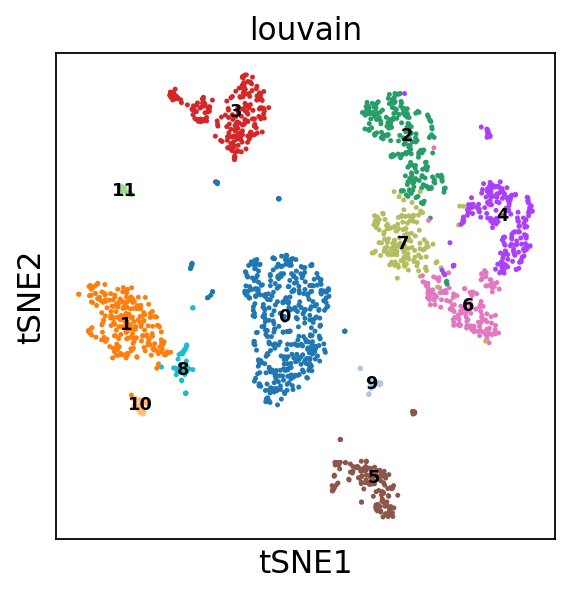

In [5]:
#res=0.6
sc.tl.louvain(adata_mnn, resolution=0.6)
sc.pl.tsne(adata_mnn, color='louvain', size=20, legend_loc='on data', legend_fontsize=8,save='_Cluster_mnn.pdf')

In [82]:
adata_mnn.obs['louvain'].to_csv("./cluster_mnn.txt", index=False)

In [3]:
#adata_mnn=sc.read("adata_mnns.h5ad")
#adata_mnn

AnnData object with n_obs × n_vars = 1948 × 1888 
    obs: 'CellID', 'CellType', 'batch', 'cell_ontology_class', 'channel', 'n_counts', 'n_genes', 'percent_mito', 'tissue', 'louvain'
    var: 'gene_ids-Kidney-10X_P4_5-0', 'gene_ids-Kidney-10X_P4_6-0', 'gene_ids-Kidney-10X_P7_5-0', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'gene_ids-Kidney-10X_P4_5-1', 'gene_ids-Kidney-10X_P4_6-1', 'gene_ids-Kidney-10X_P7_5-1', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1', 'gene_ids-Kidney-10X_P4_5-2', 'gene_ids-Kidney-10X_P4_6-2', 'gene_ids-Kidney-10X_P7_5-2', 'n_cells-2', 'highly_variable-2', 'means-2', 'dispersions-2', 'dispersions_norm-2'
    uns: 'CellType_colors', 'batch_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_tsne'
    varm: 'PCs'

In [83]:
adata.write("./adata.h5ad")
adata_base.write("./adata_base.h5ad")
adata_combat.write("./adata_combat.h5ad")
adata_reg.write("./adata_reg.h5ad")
corrected_merged_dge.write("./adata_scanorama.h5ad")
adata_mnn.write("./adata_mnns.h5ad")

In [84]:
import glob
fnames = glob.glob("adata_*.h5ad")
fnames

['adata_base.h5ad',
 'adata_combat.h5ad',
 'adata_reg.h5ad',
 'adata_mnns.h5ad',
 'adata_scanorama.h5ad']

In [85]:
for fname in fnames:
    adata = sc.read_h5ad(fname)
    df = pd.DataFrame(adata.X)
    df.index = adata.obs.index
    df.columns = adata.var.index
    df.to_csv(fname.split('.')[0]+'.dge.csv')